In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [12]:
data =pd.read_excel("flixpatroll.xlsx")
data.head()

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
0,1.0,The Night Agent,TV Show,2023.0,Action,"812,100,000",812.1M
1,2.0,Ginny & Georgia,TV Show,2021.0,Drama,"665,100,000",665.1M
2,3.0,The Glory,TV Show,2022.0,Thriller,"622,800,000",622.8M
3,4.0,Wednesday,TV Show,2022.0,Fantasy,"507,700,000",507.7M
4,5.0,Queen Charlotte: A Bridgerton Story,TV Show,2023.0,Drama,"503,000,000",503.0M


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18164 entries, 0 to 18163
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  18164 non-null  float64
 1   Title                 18164 non-null  object 
 2   Type                  18164 non-null  object 
 3   Premiere              18030 non-null  float64
 4   Genre                 17984 non-null  object 
 5   Watchtime             18164 non-null  object 
 6   Watchtime in Million  18164 non-null  object 
dtypes: float64(2), object(5)
memory usage: 993.5+ KB


In [15]:
data["Premiere"] = data["Premiere"].astype("Int64")
data["Rank"] = data ["Rank"].astype("Int64")
data.head()


,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
0,1,The Night Agent,TV Show,2023,Action,"812,100,000",812.1M
1,2,Ginny & Georgia,TV Show,2021,Drama,"665,100,000",665.1M
2,3,The Glory,TV Show,2022,Thriller,"622,800,000",622.8M
3,4,Wednesday,TV Show,2022,Fantasy,"507,700,000",507.7M
4,5,Queen Charlotte: A Bridgerton Story,TV Show,2023,Drama,"503,000,000",503.0M


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18164 entries, 0 to 18163
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Rank                  18164 non-null  Int64 
 1   Title                 18164 non-null  object
 2   Type                  18164 non-null  object
 3   Premiere              18030 non-null  Int64 
 4   Genre                 17984 non-null  object
 5   Watchtime             18164 non-null  object
 6   Watchtime in Million  18164 non-null  object
dtypes: Int64(2), object(5)
memory usage: 1.0+ MB


In [17]:
data.columns

Index(['Rank', 'Title', 'Type', 'Premiere', 'Genre', 'Watchtime',
       'Watchtime in Million'],
      dtype='object')

In [18]:
data.isnull().sum()

Rank                      0
Title                     0
Type                      0
Premiere                134
Genre                   180
Watchtime                 0
Watchtime in Million      0
dtype: int64

In [19]:
df= data.dropna()
df.head()

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
0,1,The Night Agent,TV Show,2023,Action,"812,100,000",812.1M
1,2,Ginny & Georgia,TV Show,2021,Drama,"665,100,000",665.1M
2,3,The Glory,TV Show,2022,Thriller,"622,800,000",622.8M
3,4,Wednesday,TV Show,2022,Fantasy,"507,700,000",507.7M
4,5,Queen Charlotte: A Bridgerton Story,TV Show,2023,Drama,"503,000,000",503.0M


In [20]:
df.isnull().sum()

Rank                    0
Title                   0
Type                    0
Premiere                0
Genre                   0
Watchtime               0
Watchtime in Million    0
dtype: int64

In [21]:
df["Type"].unique()

array(['TV Show', 'Movie'], dtype=object)

In [22]:
df["Genre"].unique()

array(['Action', 'Drama', 'Thriller', 'Fantasy', 'Crime', 'Reality-Show',
       'Comedy', 'History', 'Superhero', 'Animation', 'Science Fiction',
       'Horror', 'Adventure', 'Documentary', 'War', 'Musical', 'Romance',
       'Family', 'Stand-Up', 'Western', 'Sports', 'Biography',
       'Talk Show', 'Game-Show', 'Broadcast', 'Concerts', 'News',
       'Fairy Tale'], dtype=object)

In [23]:
df["Premiere"].unique()

<IntegerArray>
[2023, 2021, 2022, 2018, 2011, 2020, 2012, 2013, 2010, 2016, 2003, 2019, 2008,
 2017, 2000, 2004, 2015, 2014, 2009, 1996, 2005, 1994, 2007, 2001, 1989, 1997,
 2006, 2002, 1993, 1999, 1995, 1972, 1983, 1978, 1998, 1974, 1986, 1988, 1991,
 1976, 1985, 1987, 1992, 1977, 1990, 1979, 1973, 1982, 1966, 1984, 1980, 1975,
 1940, 1963, 1970, 1981, 1964, 1960, 1971, 1968, 1969, 1962, 1954, 1961, 1953,
 1957, 1956, 1958, 1965, 1951, 1955, 1967, 1952]
Length: 73, dtype: Int64

In [24]:
df.head()

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
0,1,The Night Agent,TV Show,2023,Action,"812,100,000",812.1M
1,2,Ginny & Georgia,TV Show,2021,Drama,"665,100,000",665.1M
2,3,The Glory,TV Show,2022,Thriller,"622,800,000",622.8M
3,4,Wednesday,TV Show,2022,Fantasy,"507,700,000",507.7M
4,5,Queen Charlotte: A Bridgerton Story,TV Show,2023,Drama,"503,000,000",503.0M


In [25]:
type_average=df.groupby("Type")[["Watchtime"]].sum().round().reset_index()
type_average

,Type,Watchtime
0,Movie,"249,900,000209,700,000201,800,000181,800,00017..."
1,TV Show,"812,100,000665,100,000622,800,000507,700,00050..."


In [26]:
rank_average=df.groupby("Type")[["Rank"]].mean().reset_index()
rank_average

,Type,Rank
0,Movie,10666.579036
1,TV Show,6649.615385


Text(0.5, 1.0, 'Rank Average of Types')

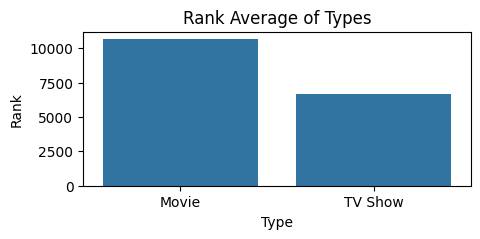

In [27]:
plt.figure(figsize=(5,2))
sns.barplot(x = "Type",y="Rank",data=rank_average)
plt.xlabel("Type")
plt.ylabel("Rank")
plt.title("Rank Average of Types")

In [29]:
df.head()

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
0,1,The Night Agent,TV Show,2023,Action,"812,100,000",812.1M
1,2,Ginny & Georgia,TV Show,2021,Drama,"665,100,000",665.1M
2,3,The Glory,TV Show,2022,Thriller,"622,800,000",622.8M
3,4,Wednesday,TV Show,2022,Fantasy,"507,700,000",507.7M
4,5,Queen Charlotte: A Bridgerton Story,TV Show,2023,Drama,"503,000,000",503.0M


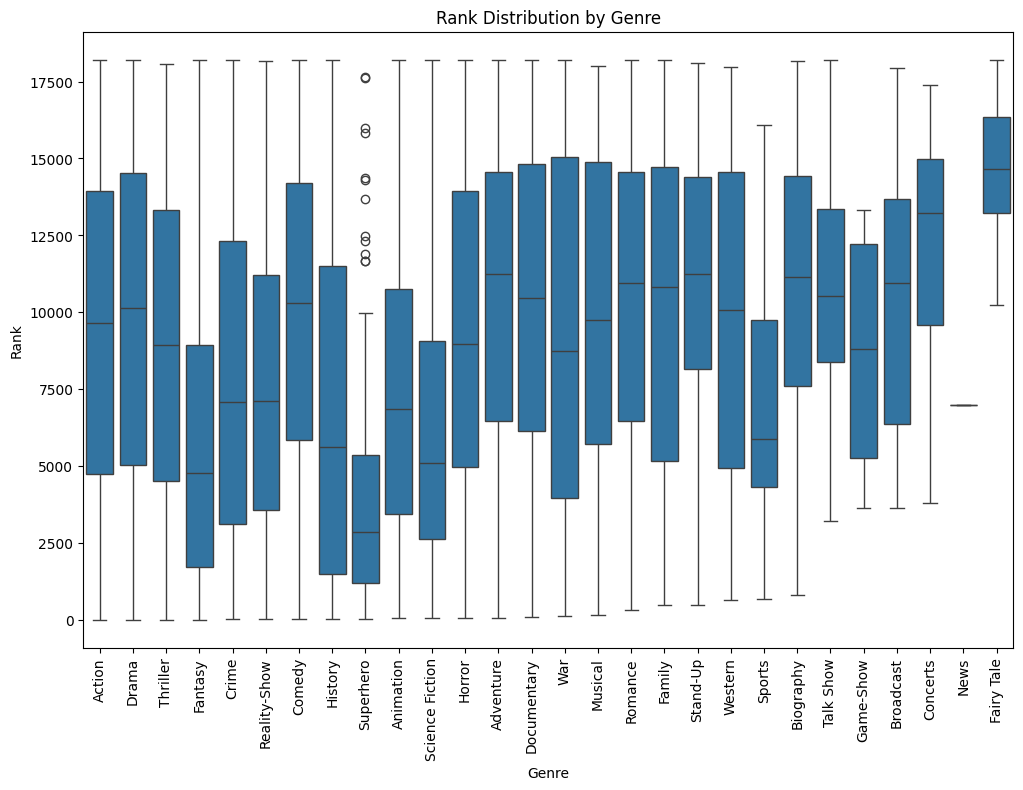

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='Rank', data=df)
plt.title('Rank Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Rank')
plt.xticks(rotation=90)
plt.show()
